### Spam Detection

Aim - The aim is to create a model that can accurately identify spam messages and distinguish them from valid ones. The goal is to automate the process of spam detection using text analysis methods.

##### importing required libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
spam = pd.read_csv('spam.csv')

In [4]:
import nltk

In [5]:
import re

In [6]:
from nltk.corpus import stopwords

In [7]:
from nltk.tokenize import word_tokenize

In [8]:
spam

,text,labels
0,U have a Secret Admirer who is looking 2 make ...,1
1,URGENT! Your Mobile number has been awarded wi...,1
2,Talk sexy!! Make new friends or fall in love i...,1
3,\URGENT! This is the 2nd attempt to contact U!...,1
4,This message is free. Welcome to the new & imp...,1
...,...,...
1492,Ur TONEXS subscription has been renewed and yo...,1
1493,No 1 POLYPHONIC tone 4 ur mob every week! Just...,1
1494,Our dating service has been asked 2 contact U ...,1
1495,FreeMsg>FAV XMAS TONES!Reply REAL,1


#### Text Preprocessing

In [37]:
#to check null values
spam.isnull().sum()

text      0
labels    0
dtype: int64

In [10]:
#download stopwords and punkt tokenizer
import  nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
#preprocessing function
def preprocess_text(text):
    #convert to lowecase
    text = text.lower()
    #remove URLs
    text = re.sub(r'http\S+/www\S+', '',text,flags = re.MULTILINE)
    #remove special characters , numbers, and punctuation
    text = re.sub(r'[^a-zA-Z\s]','',text)
    #tokenize
    words = word_tokenize(text)
    #remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    #join tokens back to string
    return ' '.join(words)
#apply preprocessing to the text column
spam['text'] = spam['text'].apply(preprocess_text)

#view cleaned text
spam[['text']].head()


,text
0,u secret admirer looking make contact ufind rr...
1,urgent mobile number awarded bonus caller priz...
2,talk sexy make new friends fall love worlds di...
3,urgent nd attempt contact uu call b tcsbcmwcnx...
4,message free welcome new improved sex dogging ...


In [12]:
spam

,text,labels
0,u secret admirer looking make contact ufind rr...,1
1,urgent mobile number awarded bonus caller priz...,1
2,talk sexy make new friends fall love worlds di...,1
3,urgent nd attempt contact uu call b tcsbcmwcnx...,1
4,message free welcome new improved sex dogging ...,1
...,...,...
1492,ur tonexs subscription renewed charged choose ...,1
1493,polyphonic tone ur mob every week txt pt st to...,1
1494,dating service asked contact u someone shy cal...,1
1495,freemsgfav xmas tonesreply real,1


#### Feature extraction Using TF-IDF

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
vectorizer = TfidfVectorizer(stop_words = 'english',max_features=5000)

In [15]:
tfidf_matrix = vectorizer.fit_transform(spam['text'])


In [16]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

##### Train test Split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = tfidf_matrix
y= spam['labels']

In [19]:
X

<1497x4535 sparse matrix of type '<class 'numpy.float64'>'
	with 19113 stored elements in Compressed Sparse Row format>

In [20]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1492    1
1493    1
1494    1
1495    1
1496    1
Name: labels, Length: 1497, dtype: int64

In [22]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

### Model Training

### Naive bayes

In [23]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [24]:
y_pred = model.predict(X_test)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.96      0.99      0.97       162
           1       0.98      0.95      0.97       138

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [27]:
cm = confusion_matrix(y_test,y_pred)

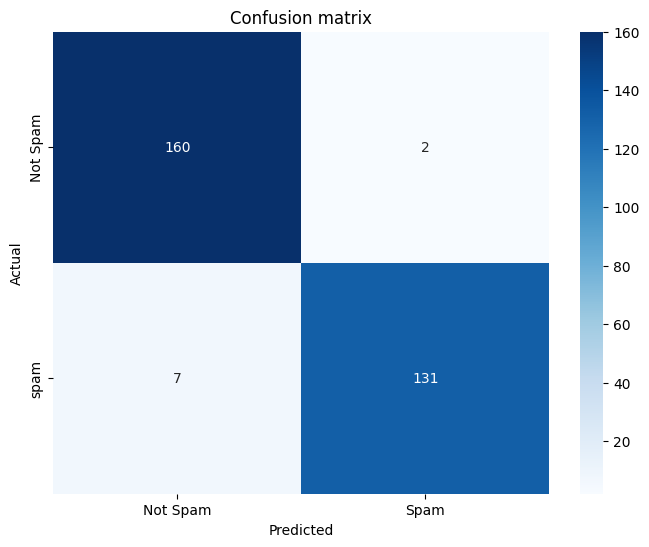

In [28]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues',xticklabels=['Not Spam','Spam'],yticklabels =['Not Spam','spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()                          

##### new prediction

In [36]:
new_text = ["free tickets to a Movie , call now 7845454512?!"]

#convert the new text into TF-IDF Vector
new_text_tfidf = vectorizer.transform(new_text)

#predict using the trained model
prediction = model.predict(new_text_tfidf)

#print the result
if prediction ==1:
    print("The message is spam")
else:
    print("the message is not spam")

The message is spam


##### save the model and vectorizer

In [34]:
import joblib

# save the trained model
joblib.dump(model,'spam_detection_model.pkl')

#save the TF-IDF Vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']